# Hand Gesture Classification System

This notebook demonstrates the end-to-end pipeline for a real-time hand gesture classification system. 
The pipeline includes:
1. **Data Preprocessing**: Normalizing MediaPipe landmarks.
2. **Visualization**: Spot-checking the data.
3. **Model Training**: Comparing Random Forest, SVM, and Logistic Regression.
4. **Evaluation**: Measuring performance with F1-scores and Confusion Matrices.

## 1. Landmark Visualization
Before training, we visualize a few samples to ensure the landmarks are correctly extracted and the skeleton structure is intact.

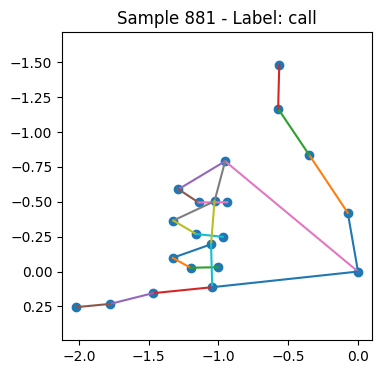

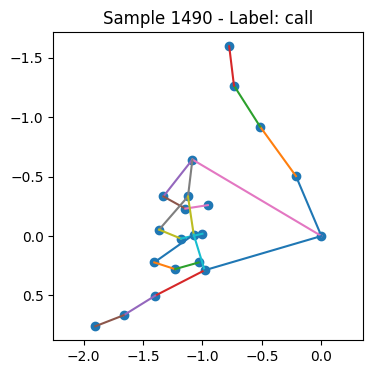

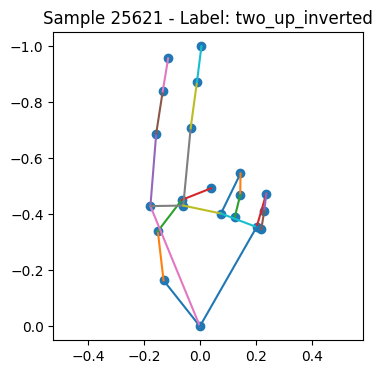

In [ ]:
import sys
sys.path.append("./src")

from preprocessing import load_and_split
from visualization import plot_multiple_samples
import pandas as pd

# Load raw (not split yet for visualization)
df = pd.read_csv(r"data\hand_landmarks_data.csv")

from preprocessing import normalize_landmarks
df_norm = normalize_landmarks(df)

plot_multiple_samples(df_norm, n_samples=5)


## 2. Data Loading and Splitting
We load the CSV dataset and split it into training and testing sets. Normalization is applied during loading.

In [2]:
import sys
sys.path.append("./src")  # so Python sees src

from preprocessing import load_and_split

X_train, X_test, y_train, y_test = load_and_split(r"data\hand_landmarks_data.csv")

print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts())

(20540, 63)
(5135, 63)
label
three2             1322
palm               1319
four               1307
ok                 1274
stop_inverted      1253
call               1205
peace_inverted     1198
stop               1186
rock               1166
three              1165
peace              1153
like               1149
two_up_inverted    1097
two_up             1074
dislike            1036
one                1010
mute                870
fist                756
Name: count, dtype: int64


## 3. Model Training
We train three different classifiers using Grid Search to find the best hyperparameters.

In [3]:
import sys
sys.path.append("./src")

from train import train_random_forest, train_svm, train_logistic_regression

# Train models in memory, debug mode for speed
rf_model = train_random_forest(X_train, y_train, debug=False)


INFO:root:Training Random Forest Classifier...


Fitting 3 folds for each of 8 candidates, totalling 24 fits


INFO:root:RF best params: {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 200}


In [4]:
svm_model = train_svm(X_train, y_train, debug=False)


INFO:root:Training SVM...


Fitting 3 folds for each of 9 candidates, totalling 27 fits


INFO:root:SVM best params: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [5]:
lr_model = train_logistic_regression(X_train, y_train, debug=False)

models = {
    'RandomForest': rf_model,
    'SVM': svm_model,
    'LogisticRegression': lr_model
}

INFO:root:Training Logistic Regression...


Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\Home\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
INFO:root:LogReg best params: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


## 4. Evaluation
We evaluate the models on the test set and display confusion matrices.

Evaluating RandomForest...


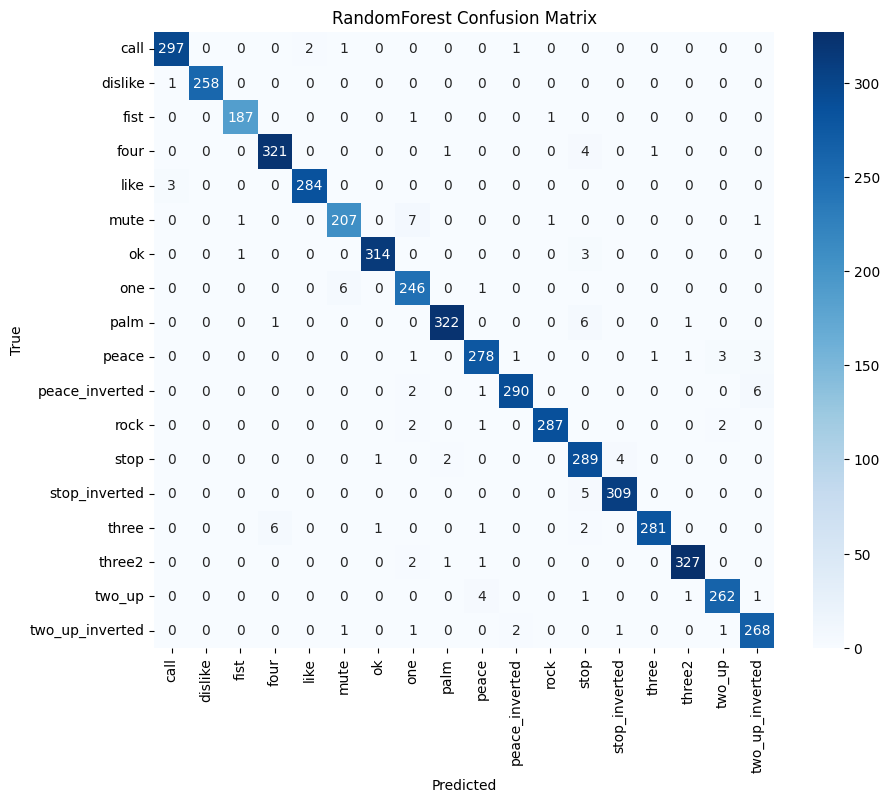

RandomForest metrics: {'accuracy': 0.9789678675754625, 'f1_score': 0.9790316867477313, 'auc': 0.9991760801459092, 'precision': 0.9792337227829311, 'recall': 0.9789678675754625}

Evaluating SVM...


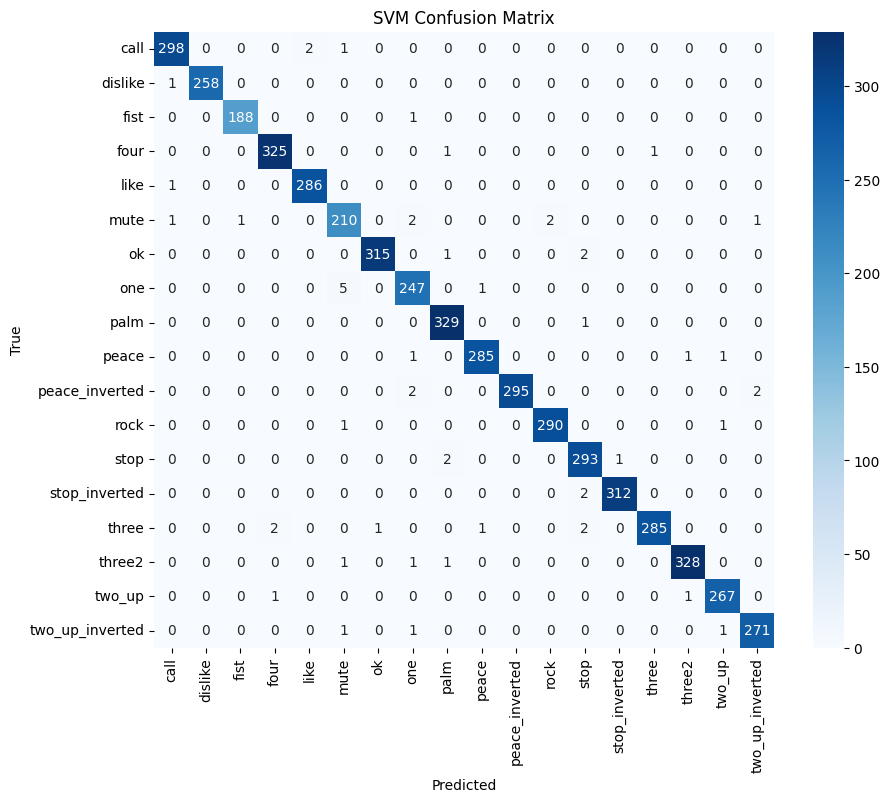

SVM metrics: {'accuracy': 0.9896786757546251, 'f1_score': 0.989691402815859, 'auc': 0.9996627107311805, 'precision': 0.9897342388669861, 'recall': 0.9896786757546251}

Evaluating LogisticRegression...


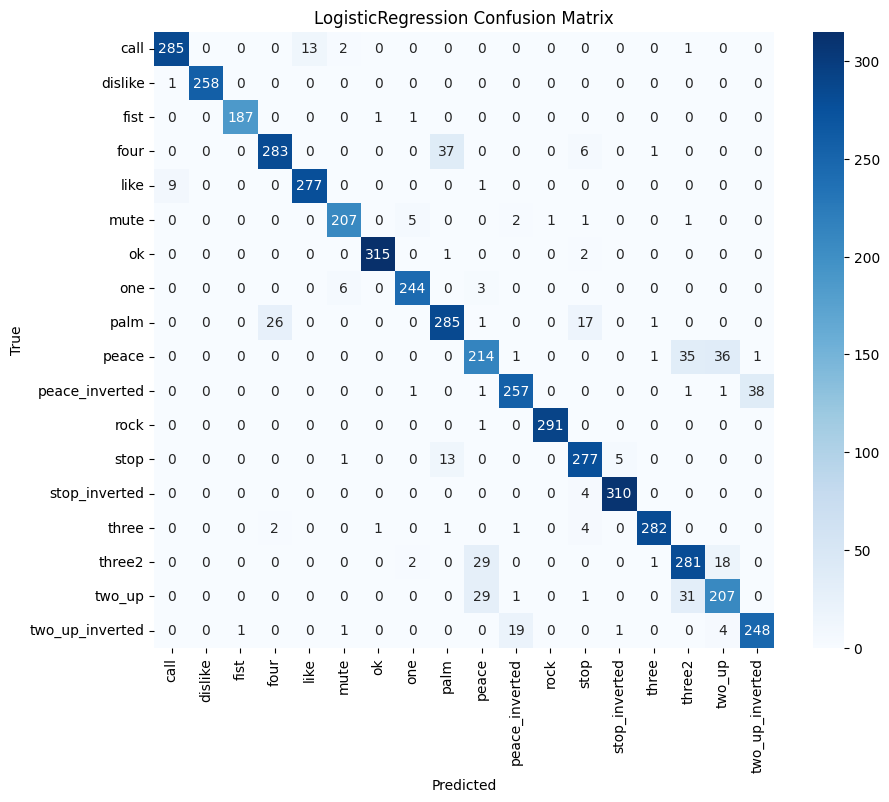

LogisticRegression metrics: {'accuracy': 0.9168451801363193, 'f1_score': 0.9168730083016479, 'auc': 0.996421710101642, 'precision': 0.9173387917813518, 'recall': 0.9168451801363193}



In [6]:
import sys
sys.path.append("./src")
from evaluation import evaluate_models
labels = sorted(y_test.unique())
results = evaluate_models(models, X_test, y_test, labels)

## 5. MLflow Tracking
Log experiments, metrics, and models to MLflow.

C:\Users\Home\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


MLflow Experiment ID: 2


INFO:root:
========== Logging 'RandomForest' (baseline) ==========


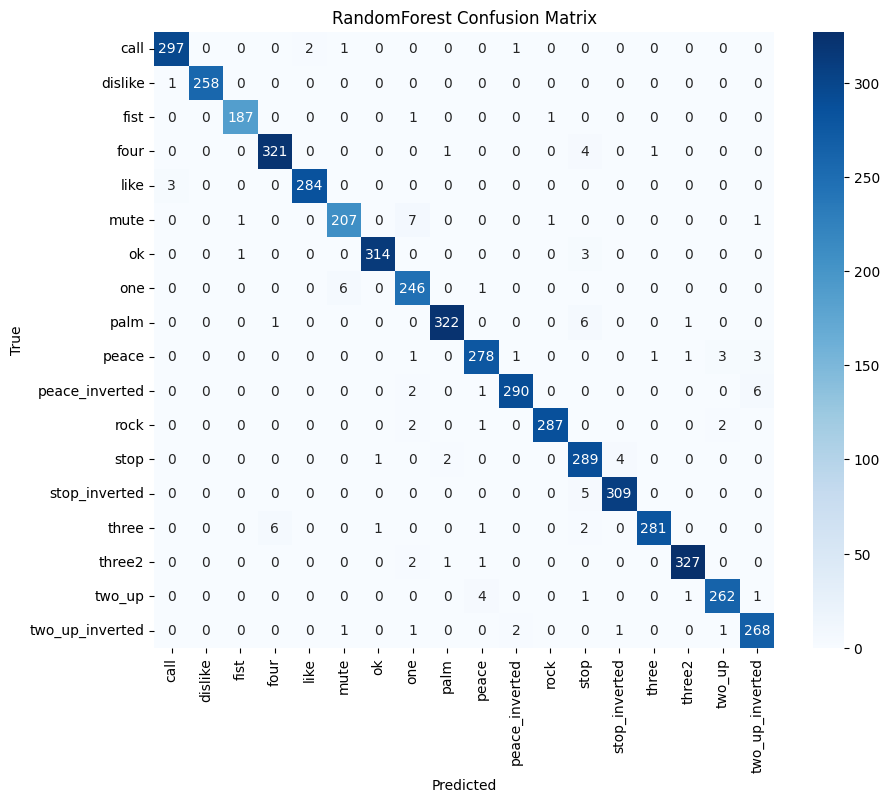

2026/02/22 04:55:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\Home\AppData\Roaming\Python\Python312\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)
Registered model 'RandomForest' already exists. Creating a new version of this model...
2026/02/22 04:56:23 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForest, version 3
Created version '3' of model 'RandomForest'.
INFO:root:Run ID: ad97c1e35dc148138b9cba92f95cc3ec
INFO:root:Model 'RandomForest' successfully logged under stage 'baseline'
INFO:root:Met

🏃 View run RandomForest-baseline-2026-02-22_04-55-46 at: http://localhost:5000/#/experiments/2/runs/ad97c1e35dc148138b9cba92f95cc3ec
🧪 View experiment at: http://localhost:5000/#/experiments/2
Logged RandomForest to MLflow


INFO:root:
========== Logging 'SVM' (baseline) ==========


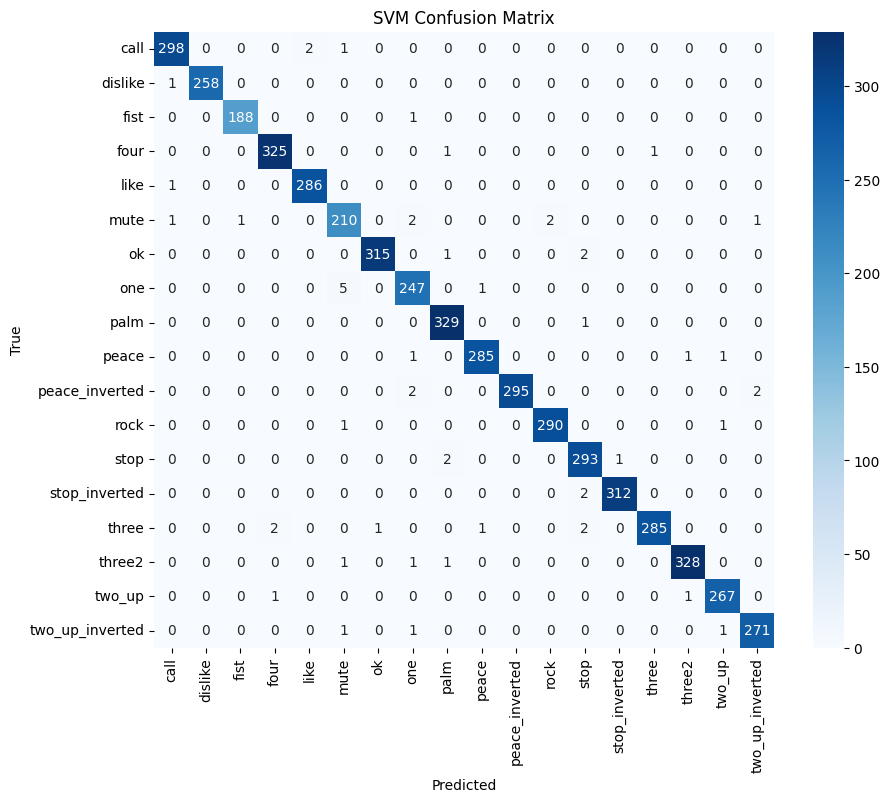

2026/02/22 04:56:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\Home\AppData\Roaming\Python\Python312\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)
Registered model 'SVM' already exists. Creating a new version of this model...
2026/02/22 04:56:50 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SVM, version 3
Created version '3' of model 'SVM'.
INFO:root:Run ID: c74ae4da73e44026ab7126537004cf94
INFO:root:Model 'SVM' successfully logged under stage 'baseline'
INFO:root:Metrics: Accuracy=0.990, F1=0.990, AUC=

🏃 View run SVM-baseline-2026-02-22_04-56-24 at: http://localhost:5000/#/experiments/2/runs/c74ae4da73e44026ab7126537004cf94
🧪 View experiment at: http://localhost:5000/#/experiments/2
Logged SVM to MLflow


INFO:root:
========== Logging 'LogisticRegression' (baseline) ==========


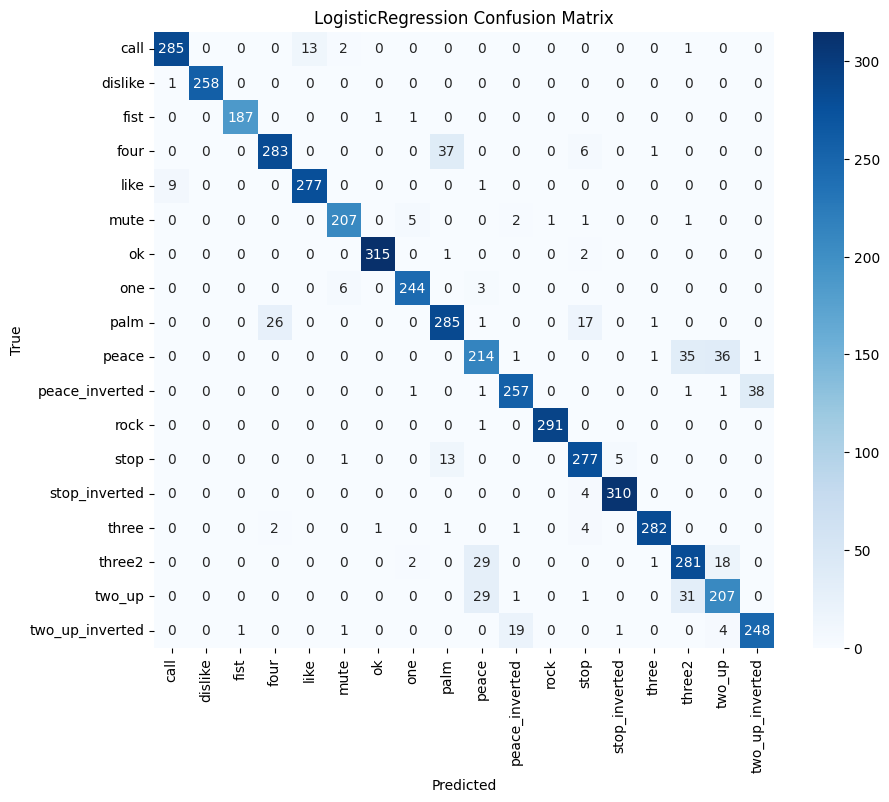

2026/02/22 04:56:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
C:\Users\Home\AppData\Roaming\Python\Python312\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)
Registered model 'LogisticRegression' already exists. Creating a new version of this model...
2026/02/22 04:57:07 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegression, version 3
Created version '3' of model 'LogisticRegression'.
INFO:root:Run ID: a1912c106c7e473e9ee8521370543b98
INFO:root:Model 'LogisticRegression' successfully logged under stage 

🏃 View run LogisticRegression-baseline-2026-02-22_04-56-50 at: http://localhost:5000/#/experiments/2/runs/a1912c106c7e473e9ee8521370543b98
🧪 View experiment at: http://localhost:5000/#/experiments/2
Logged LogisticRegression to MLflow


In [7]:
import sys
sys.path.append("./src")
from mlflow_tracking import setup_mlflow_experiment, log_model_with_mlflow
import logging

logging.basicConfig(level=logging.INFO)

# Setup MLflow experiment
exp_id = setup_mlflow_experiment("hand-gesture-classification_mlflow")
print(f"MLflow Experiment ID: {exp_id}")

# Log each model to MLflow
for model_name, model in models.items():
    # Pass labels to log confusion matrix artifact
    log_model_with_mlflow(model, X_test, y_test, model_name, exp_id, labels=labels)
    print(f"Logged {model_name} to MLflow")

## 6. Save the trained models


In [8]:
from train import save_models

# Save the trained models to the models directory
save_models(models, folder="./models")

INFO:root:Saved RandomForest -> ./models\RandomForest.pkl
INFO:root:Saved SVM -> ./models\SVM.pkl
INFO:root:Saved LogisticRegression -> ./models\LogisticRegression.pkl


## 6. Model Selection and Voting System

Based on the MLflow tracking results and evaluation metrics, the **SVM** model consistently demonstrated superior performance across accuracy, F1-score, precision, and recall.

In the interactive demo, a **voting system** is implemented where predictions from all three trained models (Random Forest, SVM, and Logistic Regression) are combined. This ensemble approach enhances the stability and reliability of real-time gesture predictions by leveraging the strengths of each model and mitigating individual model weaknesses.

## 7. Try the System (Interactive Demo)
Run the cell below to try the gesture recognition system. You can choose to use your **live webcam** or a **pre-recorded video**.

**Controls:**
- Press **'q'** in the video window to stop the processing.
- If choosing (V)ideo, ensure the file `my_hand_video.mp4` exists in the project root.

In [9]:
import sys
sys.path.append("./src")
from inference import run_gesture_demo

# Run the interactive demo
# Note: This will open an OpenCV window on your machine.
run_gesture_demo(models_dir="./models")


--- Hand Gesture Demo Setup ---
Using live webcam.
  Loaded model: LogisticRegression
  Loaded model: RandomForest
  Loaded model: SVM

Prediction Method:
  -> Selected: Majority Voting
  -> Running with 3 models: ['LogisticRegression', 'RandomForest', 'SVM']
Processing... Press 'q' in the window to stop.
Simulation ended.
